# Euler Family ODE Solver

This notebook implements various Euler methods for solving ordinary differential equations (ODEs).

## Import Required Libraries

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify, sympify

## Method 1: Euler's Method

In [57]:
def euler(f, x0, y0, h, n):
    x, y = [x0], [y0]
    for i in range(n):
        y.append(y[-1] + h * f(x[-1], y[-1]))
        x.append(x[-1] + h)
    return np.array(x), np.array(y)

## Method 2: Improved Euler's Method

In [58]:
def improved_euler(f, x0, y0, h, n):
    x, y = [x0], [y0]
    for _ in range(n):
        k1 = f(x[-1], y[-1])
        k2 = f(x[-1] + h, y[-1] + h * k1)
        y.append(y[-1] + (h / 2) * (k1 + k2))
        x.append(x[-1] + h)
    return np.array(x), np.array(y)

## Method 3: Modified Euler's Method

In [59]:
def modified_euler(f, x0, y0, h, n):
    x, y = [x0], [y0]
    for _ in range(n):
        y_mid = y[-1] + (h / 2) * f(x[-1], y[-1])
        y.append(y[-1] + h * f(x[-1] + h / 2, y_mid))
        x.append(x[-1] + h)
    return np.array(x), np.array(y)

## Method 4: Improved Modified Euler's Method

In [60]:
def improved_modified_euler(f, x0, y0, h, n):
    x, y = [x0], [y0]
    for _ in range(n):
        y_inner = y[-1] + h * f(x[-1], y[-1])
        y_mid = y[-1] + (h / 2) * f(x[-1], y_inner)
        y.append(y[-1] + h * f(x[-1] + h / 2, y_mid))
        x.append(x[-1] + h)
    return np.array(x), np.array(y)

## Method 5: AIME (Adams Improved Modified Euler)

In [61]:
def aime(f, x0, y0, h, n):
    x, y = [x0], [y0]
    for _ in range(n):
        y_half = y[-1] + (h / 2) * f(x[-1], y[-1])
        y.append(y[-1] + h * f(x[-1] + h / 2, y_half))
        x.append(x[-1] + h)
    return np.array(x), np.array(y)

## User Input and Problem Setup

In [62]:
print("\n=== Euler Family ODE Solver ===\n")
print("Enter ODE in form dy/dx = f(x, y), e.g., y - x**2 + 1")
f_expr = input("f(x, y) = ")

x_sym, y_sym = symbols('x y')
f = lambdify((x_sym, y_sym), sympify(f_expr), 'numpy')

# Get initial conditions and parameters
x0 = float(input("Enter x0 (initial x): "))
y0 = float(input("Enter y0 (initial y): "))
xn = float(input("Enter xn (final x): "))
h = float(input("Enter step size h: "))
n = int((xn - x0) / h)

# Optional exact solution
exact_opt = input("\nDo you have an exact solution to compare? (y/n): ").strip().lower()
exact_func = None
if exact_opt == 'y':
    y_exact_expr = input("Enter exact y(x) (in terms of x): ")
    exact_func = lambdify(x_sym, sympify(y_exact_expr), 'numpy')


=== Euler Family ODE Solver ===

Enter ODE in form dy/dx = f(x, y), e.g., y - x**2 + 1


## Step 1: Choose Your Method

In [63]:
# Display available methods
method_dict = {
    "1": ("Euler", euler),
    "2": ("Improved Euler", improved_euler),
    "3": ("Modified Euler", modified_euler),
    "4": ("Improved Modified Euler", improved_modified_euler),
    "5": ("AIME", aime)
}

print("\nChoose a method:")
for k, v in method_dict.items():
    print(f"{k}. {v[0]}")

choice = input("Enter choice (1-5): ").strip()
selected_method_name, selected_method_func = method_dict.get(choice, ("Euler", euler))

print(f"\nYou selected: {selected_method_name}")


Choose a method:
1. Euler
2. Improved Euler
3. Modified Euler
4. Improved Modified Euler
5. AIME

You selected: Euler


## Step 2: Compute and Plot Selected Method

In [64]:
# Compute solution for selected method
x_selected, y_selected = selected_method_func(f, x0, y0, h, n)

# Check if exact solution is available and compute errors
if exact_func:
    y_exact = exact_func(x_selected)
    error = np.abs(y_selected - y_exact)
    print("\nAbsolute Errors:")
    for xi, yi, ye, e in zip(x_selected, y_selected, y_exact, error):
        print(f"x={xi:.2f}  y={yi:.6f}  y_exact={ye:.6f}  error={e:.6e}")
else:
    print(f"\nSolution computed for {selected_method_name}!")


Solution computed for Euler!


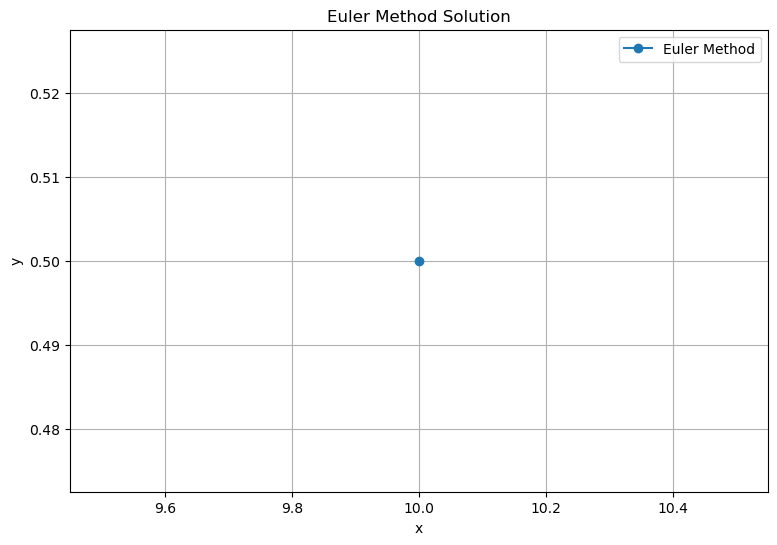

In [65]:
# Plot selected method
plt.figure(figsize=(9, 6))
plt.plot(x_selected, y_selected, 'o-', label=f'{selected_method_name} Method')

if exact_func:
    plt.plot(x_selected, y_exact, 'k--', label='Exact Solution')

plt.xlabel("x")
plt.ylabel("y")
plt.title(f"{selected_method_name} Method Solution")
plt.legend()
plt.grid(True)
plt.show()

## Step 3: Compute Solutions Using All Methods

In [66]:
# Compute solutions for all methods
methods = {
    "Euler": euler,
    "Improved Euler": improved_euler,
    "Modified Euler": modified_euler,
    "Improved Modified Euler": improved_modified_euler,
    "AIME": aime
}

results = {}
for name, method in methods.items():
    x, y = method(f, x0, y0, h, n)
    results[name] = (x, y)

# Determine reference (exact or AIME)
if exact_func:
    y_ref = exact_func(results["AIME"][0])
    ref_name = "Exact Solution"
else:
    y_ref = results["AIME"][1]
    ref_name = "AIME (Reference)"

print("\nSolutions computed for all methods successfully!")


Solutions computed for all methods successfully!


## Plot: All Methods Comparison

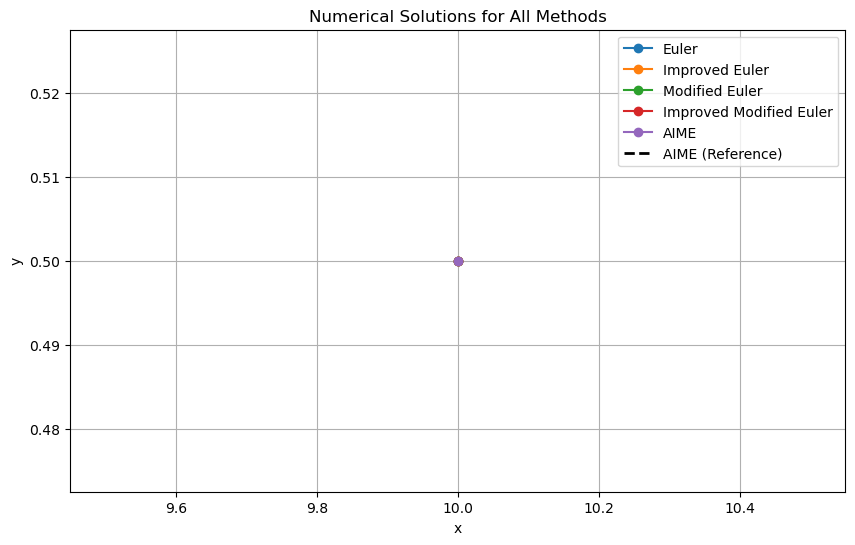

In [67]:
# Plot all methods
plt.figure(figsize=(10, 6))
for name, (x, y) in results.items():
    plt.plot(x, y, marker='o', label=name)
plt.plot(results["AIME"][0], y_ref, 'k--', linewidth=2, label=ref_name)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Numerical Solutions for All Methods")
plt.legend()
plt.grid(True)
plt.show()

## Plot: Error Comparison

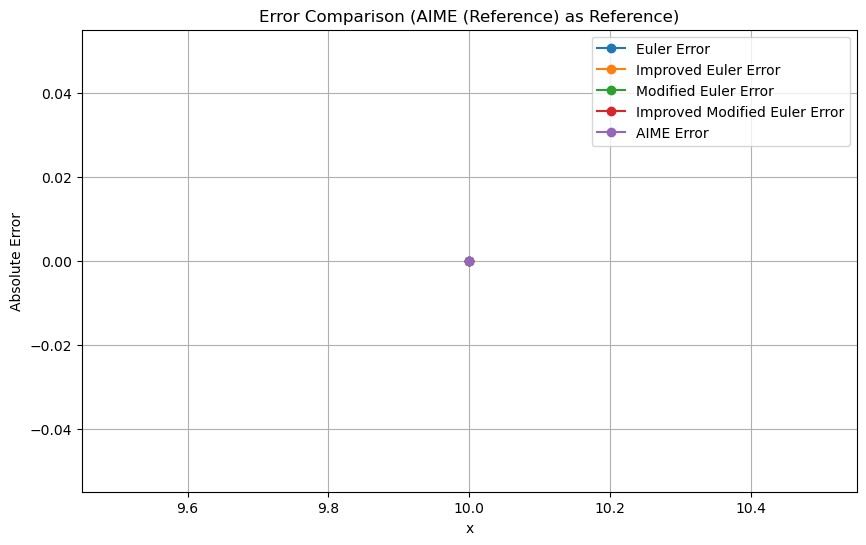

In [68]:
# Compute and plot errors for all methods
plt.figure(figsize=(10, 6))
for name, (x, y) in results.items():
    error = np.abs(y - y_ref)
    plt.plot(x, error, marker='o', label=f"{name} Error")
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.title(f"Error Comparison ({ref_name} as Reference)")
plt.legend()
plt.grid(True)
plt.show()

## Display Final Results

In [69]:
# Display final results for all methods
print("\n--- Final Results ---")
for name, (x, y) in results.items():
    print(f"\n{name}:")
    for xi, yi in zip(x, y):
        print(f"x={xi:.3f}, y={yi:.6f}")


--- Final Results ---

Euler:
x=10.000, y=0.500000

Improved Euler:
x=10.000, y=0.500000

Modified Euler:
x=10.000, y=0.500000

Improved Modified Euler:
x=10.000, y=0.500000

AIME:
x=10.000, y=0.500000
